# Data Visualization Techniques and Machine Learning for Business
 ### Heitor Gomes de Araujo Filho (2023098)
 ### Lecturer Name: David McQuaid and Muhammad Iqbal
 ### Module Title: Hdip DA for Business

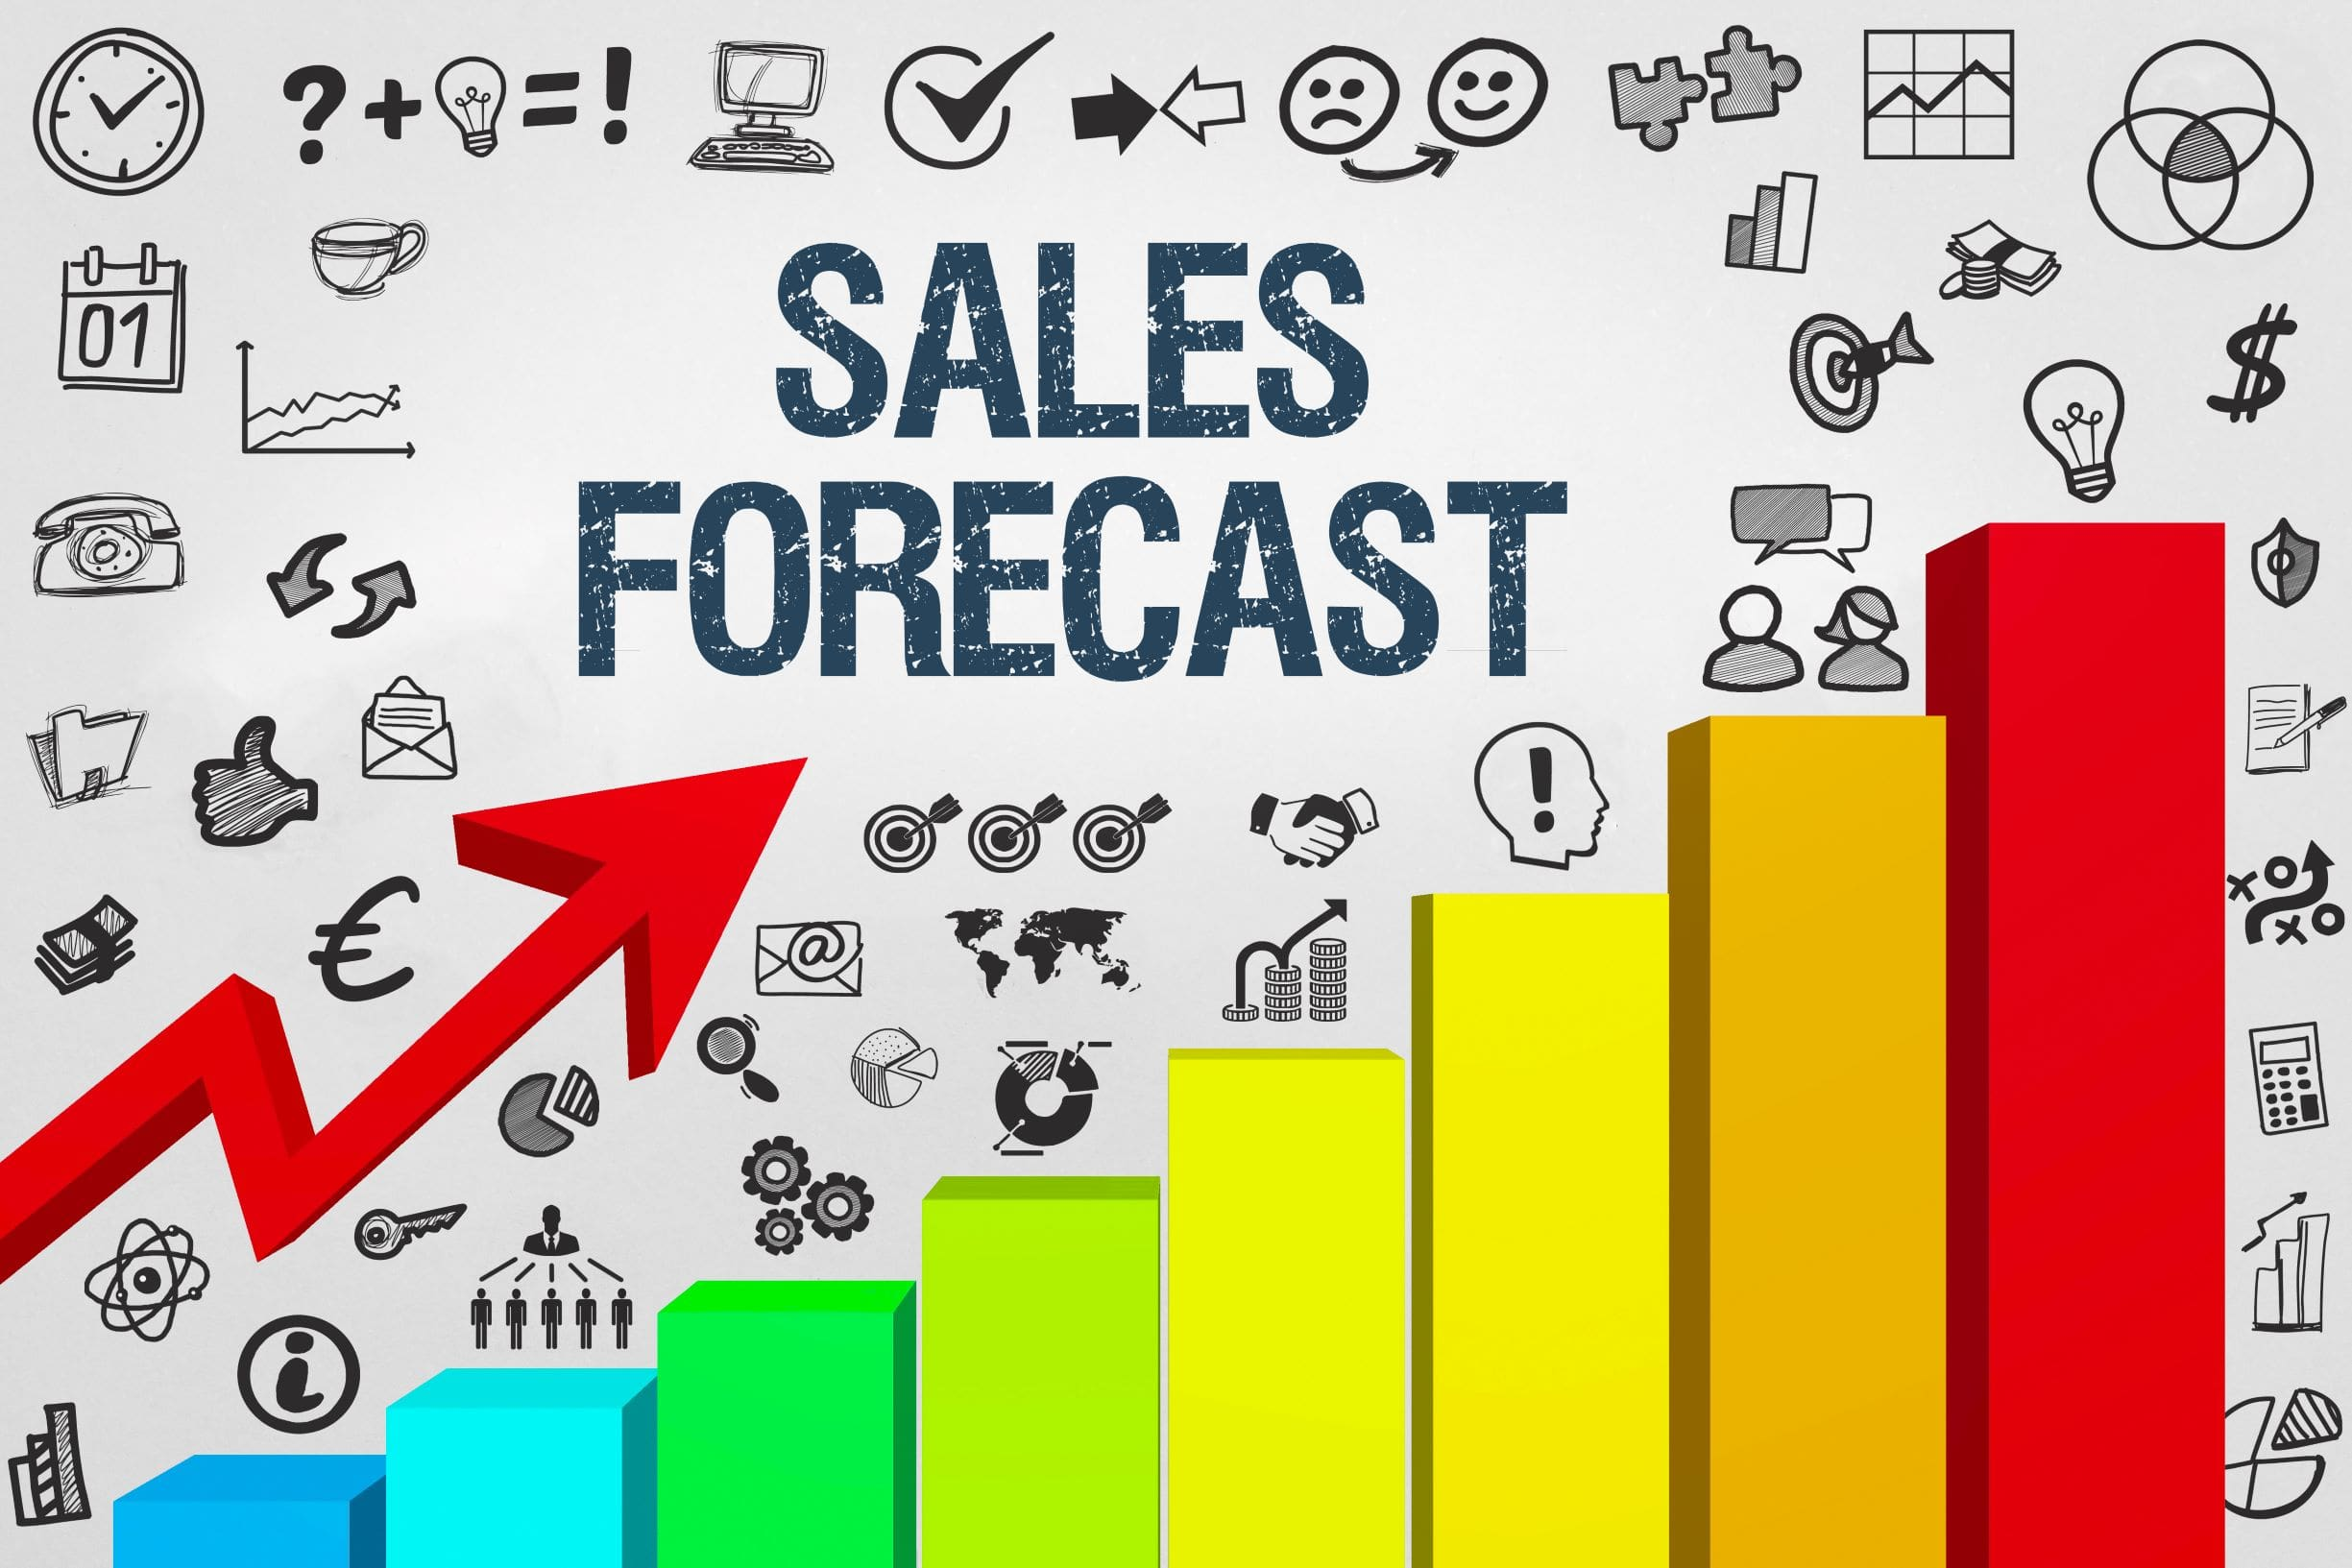

### Introduction

<p>The advent of digital platforms has brought about a substantial transformation in the way customers interact with goods and services, thereby impacting both traditional sales tactics and consumer behavior. E-commerce is a major force in this rapidly changing digital age, providing a wide range of opportunities and difficulties for companies. The use of machine learning techniques is becoming increasingly important as online retail grows, especially when it comes to deciphering the intricate web of client behaviors and preferences seen in online sales data.</p>
<p>Online sales transactions are a veritable gold mine of useful data, capturing not only the things bought but also the complex links and patterns that exist between these purchases. Market Basket Analysis (MBA) is one of the key uses of machine learning in this field. An in-depth analytical method called MBA looks at the co-occurrence patterns of objects in transactions. It aims to reveal relationships and connections between products that are often purchased in tandem, enabling firms to interpret consumer behavior and develop focused marketing campaigns.</p>
<p>Understanding client behavior is essential to business success in the e-commerce space. Machine learning algorithms, specifically those used in MBA programs, analyze transactional statistics to find trends like as which things are most likely to be purchased next or which items are frequently bought together. These insights are more than just statistics; they are actionable intelligence that companies can use to improve a number of areas of their operations.</p>
<p>Take recommendation systems, which are present on most large e-commerce sites. These systems are actually powered by highly developed machine learning algorithms that, through the analysis of transaction history, forecast and recommend products based on prior purchases or the preferences of similar users to the user. Not only do these technologies bring a personal touch to the shopping experience, but they also make a substantial income contribution by generating additional sales through intelligent suggestions.</p>
<p>Furthermore, market basket analysis is used in more contexts than only basic recommendation systems. They are essential to inventory management since they help with planning marketing campaigns, placing products in the best possible places, maximizing stock levels, and even creating cross-selling and upselling tactics.</p>
<p>It is critical for organizations to integrate machine learning techniques as they negotiate the competitive world of online sales, especially when it comes to interpreting the complex linkages found in transactional data. In an era where data is king, the capacity to uncover these hidden patterns not only improves the customer experience but also gives businesses the ability to make wise decisions, cultivate client loyalty, and increase profitability.</p>

### Data Dictionary

The dataset contains the following columns:

1. Customer ID: A unique identifier for each customer.
1. Customer Name: The name of the customer (generated by Faker).
1. Customer Age: The age of the customer (generated by Faker).
1. Gender: The gender of the customer (generated by Faker).
1. Purchase Date: The date of each purchase made by the customer.
1. Product Category: The category or type of the purchased product.
1. Product Price: The price of the purchased product.
1. Quantity: The quantity of the product purchased.
1. Total Purchase Amount: The total amount spent by the customer in each transaction.
1. Payment Method: The method of payment used by the customer (e.g., credit card, PayPal).
1. Returns: Whether the customer returned any products from the order (binary: 0 for no return, 1 for return).
1. Churn: A binary column indicating whether the customer has churned (0 for retained, 1 for churned).

### Libraries and Data Importation

In [68]:
#for data analysis
import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

#for visualistions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(palette='Paired')

#for data preprocessing and preperation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import Layout

import warnings
warnings.simplefilter("ignore")

In [69]:
df=pd.read_csv("ecommerce_customer_data.csv")

In [70]:
df.head()

Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  
0   31  Female      0  
1   31  Female      0  
2   31  Female      0  
3   31  Female      0  
4   31  Female      0

In [71]:
df.shape

(250000, 13)

In [72]:
# Get basic summary statistics
df.describe()

Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  250000.000000  250000.000000  250000.000000          250000.000000   
mean    25017.632092     254.742724       3.004936            2725.385196   
std     14412.515718     141.738104       1.414737            1442.576095   
min         1.000000      10.000000       1.000000             100.000000   
25%     12590.000000     132.000000       2.000000            1476.000000   
50%     25011.000000     255.000000       3.000000            2725.000000   
75%     37441.250000     377.000000       4.000000            3975.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age         Churn  
count  250000.000000  202618.000000  250000.000000  250000.00000  
mean       43.798276       0.500824      43.798276       0.20052  
std        15.364915       0.500001      15.364915       0.40039  
min        18.000000       0.000000      18.000000       0.00000  
25%        30.000000       0.000000      30.000000       0.00000  
50%        44.000000       1.000000      44.000000       0.00000  
75%        57.000000       1.000000      57.000000       0.00000  
max        70.000000       1.000000      70.000000       1.00000

In [73]:
df.describe(include='O')

Purchase Date Product Category Payment Method    Customer Name  \
count                250000           250000         250000           250000   
unique               249728                4              3            39878   
top     2020-10-16 09:27:42      Electronics    Credit Card  Michael Johnson   
freq                      2            62630          83547              119   

        Gender  
count   250000  
unique       2  
top       Male  
freq    125676

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [75]:
df.duplicated().sum()

0

### Checking for Missing Values

In [76]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [77]:
# Replace missing 'Returns' values with a suitable default value
default_return_value = 0
df['Returns'].fillna(default_return_value, inplace=True)

df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [78]:
# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract year and month from 'Purchase Date'
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month

In [79]:
df.head()

Customer ID       Purchase Date Product Category  Product Price  Quantity  \
0        44605 2023-05-03 21:30:02             Home            177         1   
1        44605 2021-05-16 13:57:44      Electronics            174         3   
2        44605 2020-07-13 06:16:57            Books            413         1   
3        44605 2023-01-17 13:14:36      Electronics            396         3   
4        44605 2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  Purchase Year  Purchase Month  
0   31  Female      0           2023               5  
1   31  Female      0           2021               5  
2   31  Female      0           2020               7  
3   31  Female      0           2023               1  
4   31  Female      0           2021               5

### Distribution of customers by age and gender

<Figure size 1200x600 with 0 Axes>

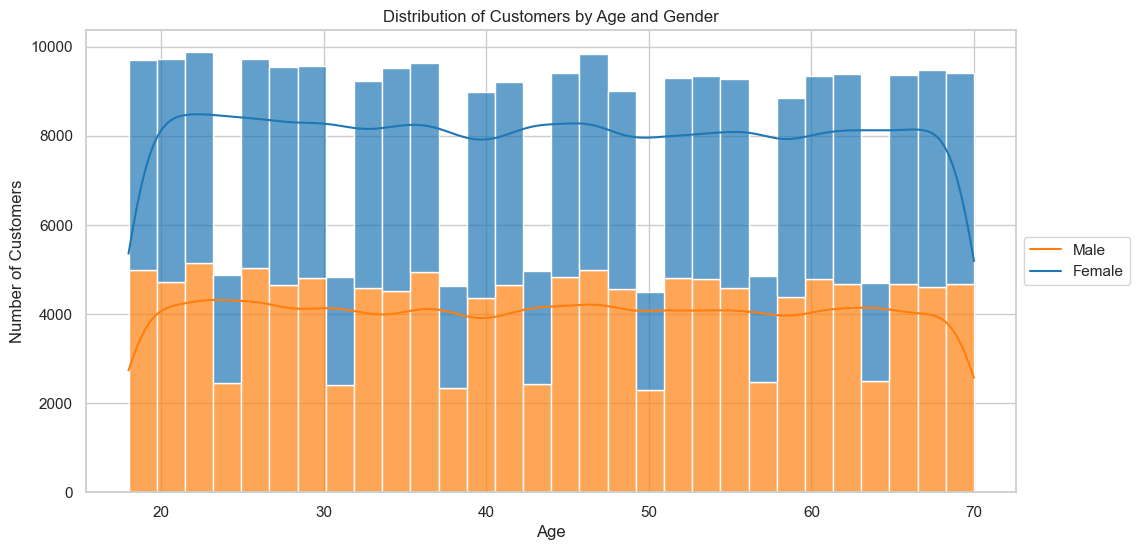

In [80]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e"]  # Blue and Orange

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of customers by age and gender
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=30, kde=True, palette=colors, alpha=0.7)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age and Gender')

# Specify legend labels
plt.legend(labels=['Male', 'Female'], loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

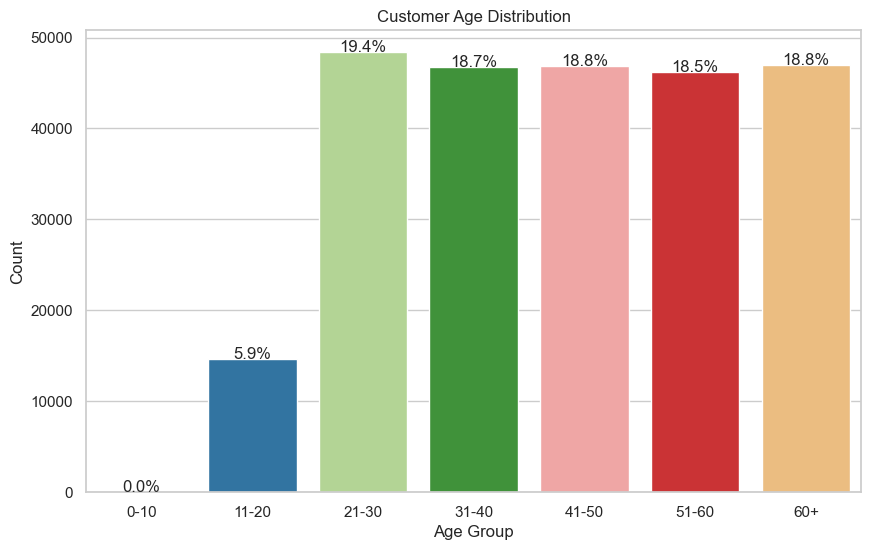

In [81]:
# Define age ranges and labels
age_ranges = [0, 10, 20, 30, 40, 50, 60, np.inf]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_ranges, labels=age_labels)

# Countplot for age distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', order=age_labels)

# Set title and labels
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add percentages on top of bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height/total:.1%}', ha="center")

plt.show()

### Average purchase amount by gender

In [82]:
# Calculate the average purchase amount by gender
average_purchase_by_gender = df.groupby('Gender')['Total Purchase Amount'].mean()

# Display the result
print(average_purchase_by_gender)

Gender
Female    2723.202728
Male      2727.544185
Name: Total Purchase Amount, dtype: float64


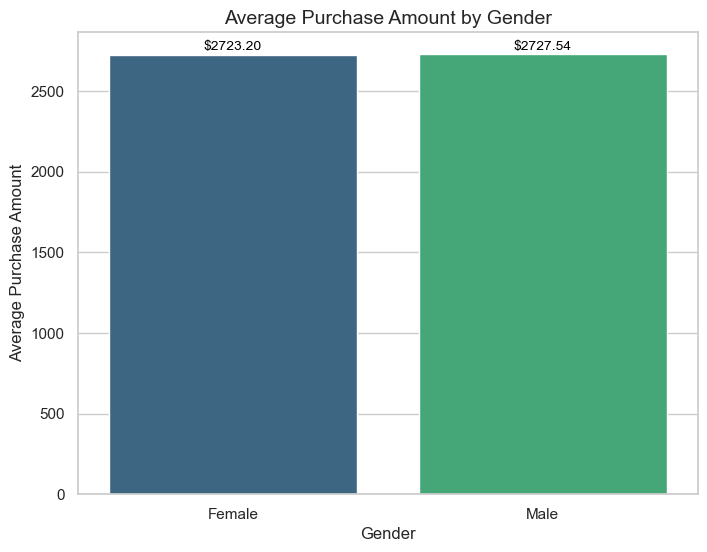

In [83]:
# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot the average purchase amount by gender
plot = sns.barplot(x=average_purchase_by_gender.index, y=average_purchase_by_gender.values, palette="viridis")

# Add annotations to each bar
for index, value in enumerate(average_purchase_by_gender.values):
    plot.text(index, value + 10, f'${value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.title('Average Purchase Amount by Gender', fontsize=14)

# Show the plot
plt.show()

### Top 4 popular product categories

In [84]:
# Group by product category, count occurrences, and sort by count in descending order
top_categories = df['Product Category'].value_counts().reset_index(name='Count').rename(columns={'index': 'Product Category'})

# Display the top 4 popular product categories
top_4_categories = top_categories.head(4)
print(top_4_categories)

  Product Category  Count
0      Electronics  62630
1         Clothing  62581
2             Home  62542
3            Books  62247


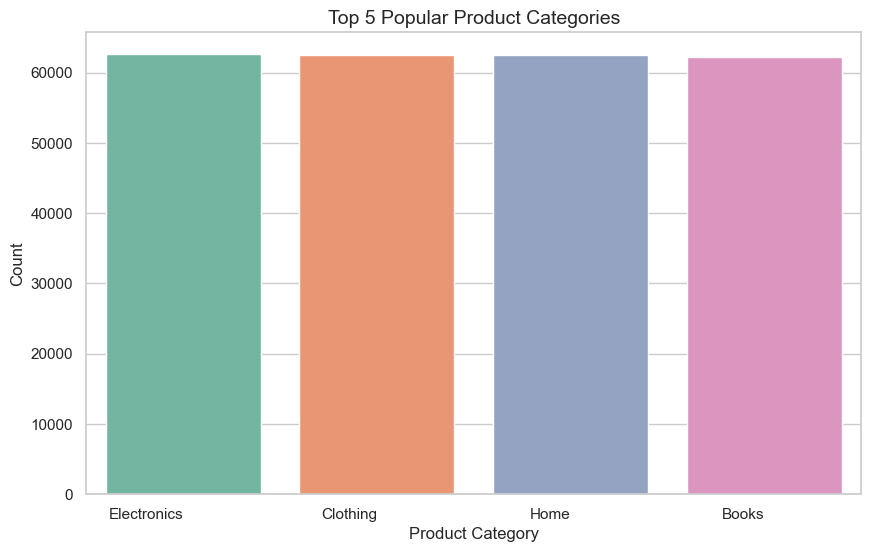

In [85]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the top 5 popular product categories
plot = sns.barplot(x='Product Category', y='Count', data=top_4_categories, palette='Set2')

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')

# Set labels and title
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 5 Popular Product Categories', fontsize=14)

# Show the plot
plt.show()

### Frequency Distribution of Purchase Dates

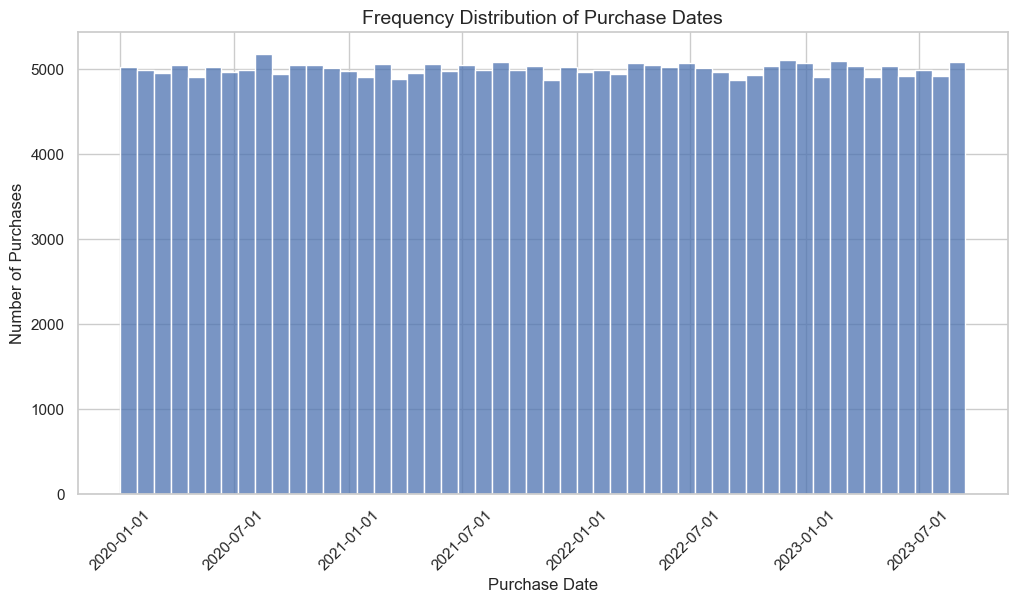

In [86]:
# Set up the figure and axis with increased size
plt.figure(figsize=(12, 6))

# Plot the frequency distribution of purchase dates
sns.histplot(df['Purchase Date'], bins=50, kde=False)

# Set date format for x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Purchase Date', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.title('Frequency Distribution of Purchase Dates', fontsize=14)

# Show the plot
plt.show()

### Average quantity of products purchased in a single transaction

In [88]:
# Calculate the average quantity of products purchased in a single transaction
average_quantity_per_transaction = df.groupby('Product Category')['Quantity'].mean()

# Calculate the overall average quantity
overall_average_quantity = average_quantity_per_transaction.mean()

# Display the result
print(f"Average quantity of products purchased in a single transaction: {overall_average_quantity:.2f}")

Average quantity of products purchased in a single transaction: 3.00


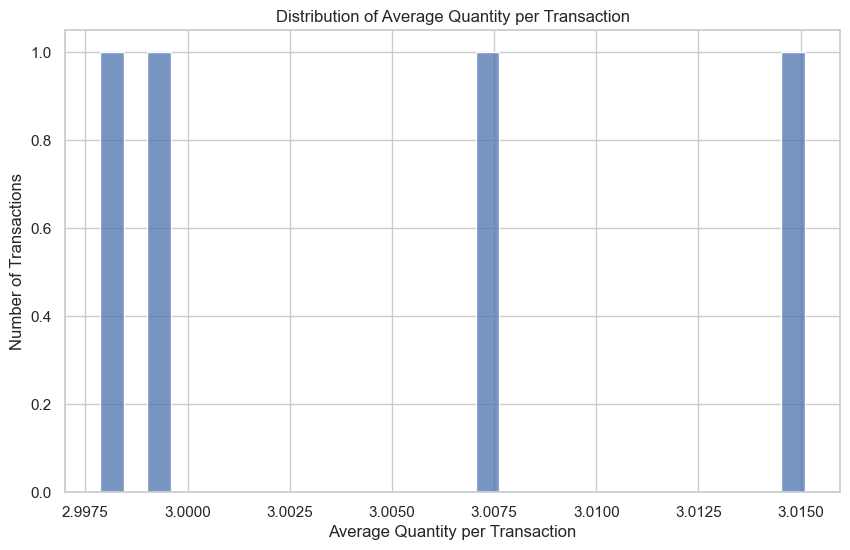

In [89]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of quantities per transaction
sns.histplot(df.groupby('Product Category')['Quantity'].mean(), bins=30, kde=False)

# Set labels and title
plt.xlabel('Average Quantity per Transaction')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Average Quantity per Transaction')

# Show the plot
plt.show()

### Most Popular Product Categories and Their Average Prices

In [90]:
# Group by product category, calculate total purchase amount and count
category_stats = df.groupby('Product Category')['Total Purchase Amount'].agg(['sum', 'count']).reset_index()

# Calculate average price for each category
category_stats['Average Price'] = category_stats['sum'] / category_stats['count']

# Sort by total purchase amount to find the most popular categories
category_stats = category_stats.sort_values(by='sum', ascending=False)

# Display the result
print(category_stats[['Product Category', 'sum', 'count', 'Average Price']].head())

  Product Category        sum  count  Average Price
3             Home  171138916  62542    2736.383806
1         Clothing  170716122  62581    2727.922564
2      Electronics  170146025  62630    2716.685694
0            Books  169345236  62247    2720.536508


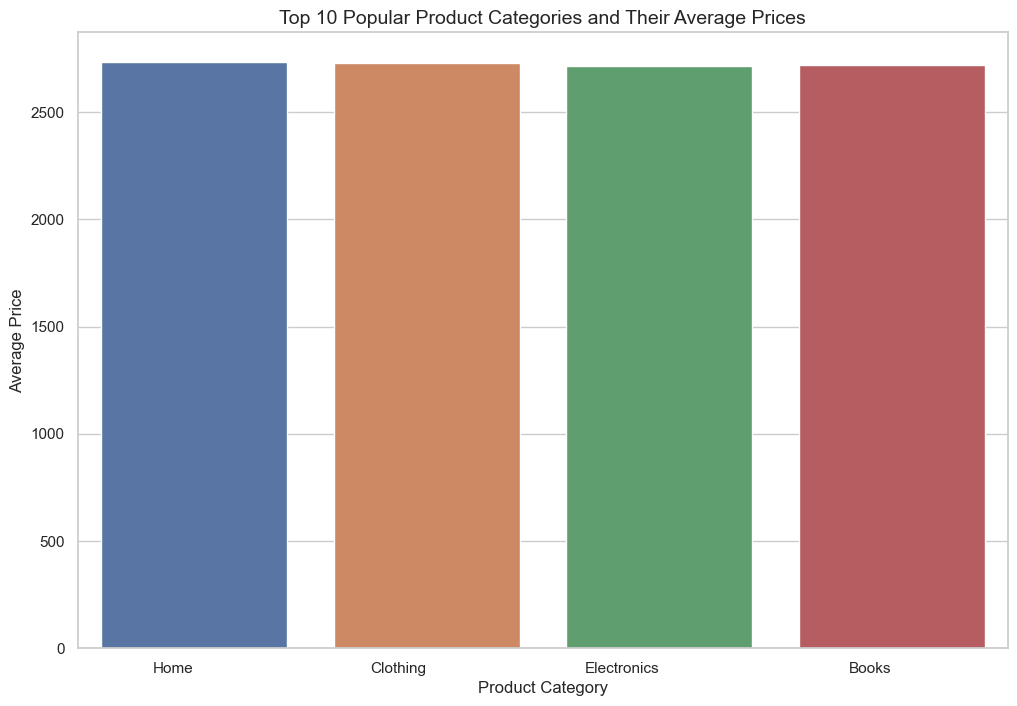

In [96]:
# Set up the figure and axis with increased size
plt.figure(figsize=(12, 8))

# Plot the most popular product categories and their average prices
sns.barplot(x='Product Category', y='Average Price', data=category_stats.head(10))

# Set labels and title with increased font sizes
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Top 10 Popular Product Categories and Their Average Prices', fontsize=14)

# Rotate x-axis labels for better readability and alignment
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()

### Distribution of Total Purchase Amounts

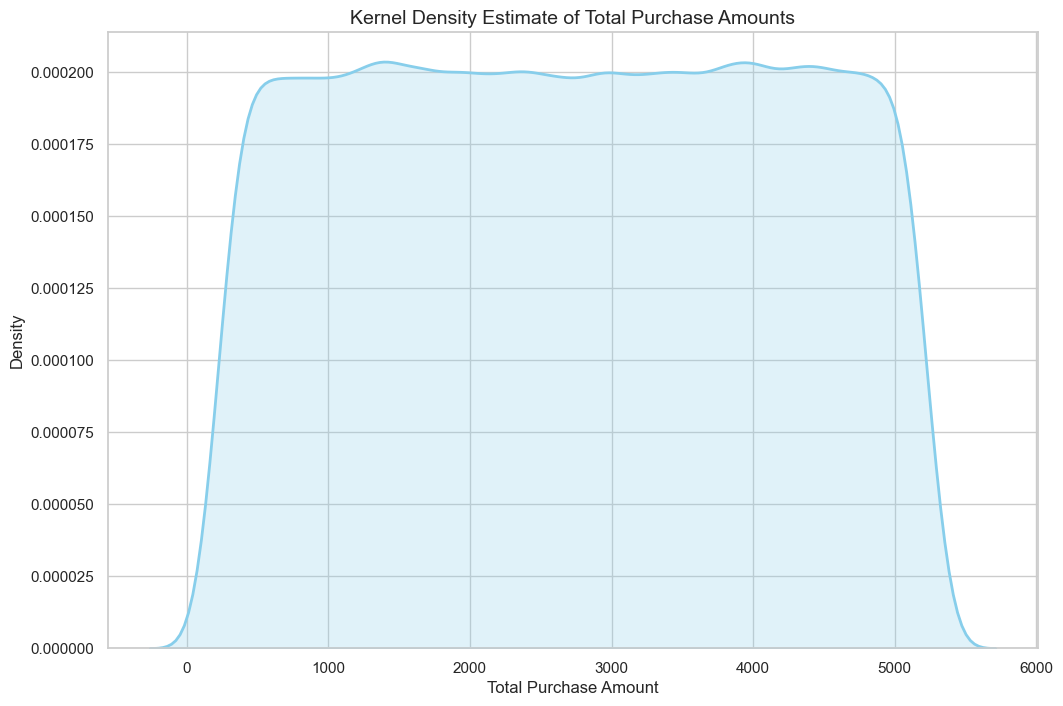

In [93]:
# Set up the figure and axis with increased size
plt.figure(figsize=(12, 8))

# Plot the kernel density estimate of total purchase amounts with modified fill color and line style
sns.kdeplot(df['Total Purchase Amount'], fill=True, color='skyblue', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('Total Purchase Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Kernel Density Estimate of Total Purchase Amounts', fontsize=14)

# Show the plot
plt.show()

### Distribution of Payment Methods Used by Customers

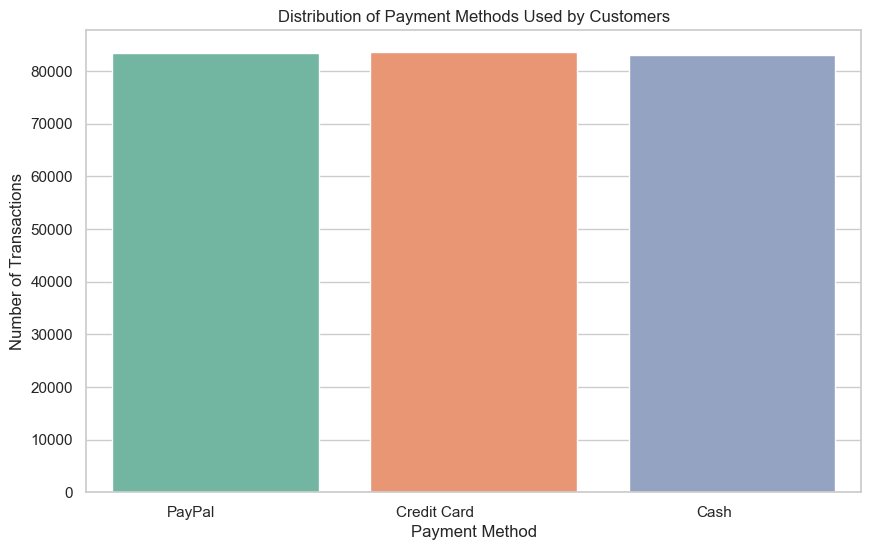

In [97]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of payment methods
sns.countplot(x='Payment Method', data=df, palette='Set2')

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Methods Used by Customers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()

### Average Purchase Amount by Payment Method

In [25]:
# Calculate the average purchase amount by payment method
average_purchase_by_payment_method = df.groupby('Payment Method')['Total Purchase Amount'].mean()

# Display the result
print(average_purchase_by_payment_method)

Payment Method
Cash           2715.557437
Credit Card    2738.852562
PayPal         2721.677952
Name: Total Purchase Amount, dtype: float64


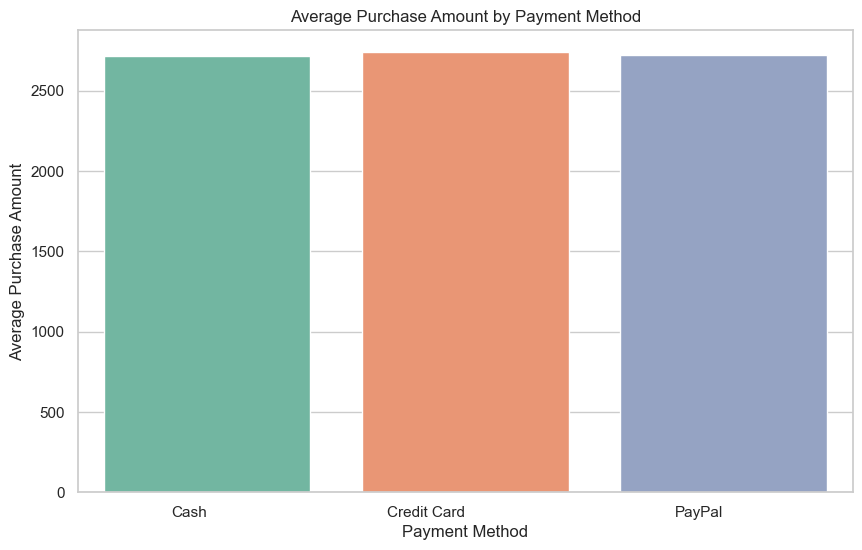

In [99]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the average purchase amount by payment method
sns.barplot(x=average_purchase_by_payment_method.index, y=average_purchase_by_payment_method.values, palette='Set2')

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Payment Method')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()

### Most Commonly Returned Product Categories

In [27]:
# Group by product category and calculate the total number of returns
returns_by_category = df.groupby('Product Category')['Returns'].sum()

# Sort in descending order to find the most commonly returned product categories
most_returned_categories = returns_by_category.sort_values(ascending=False)

# Display the result
print(most_returned_categories)

Product Category
Electronics    25448.0
Books          25406.0
Home           25320.0
Clothing       25302.0
Name: Returns, dtype: float64


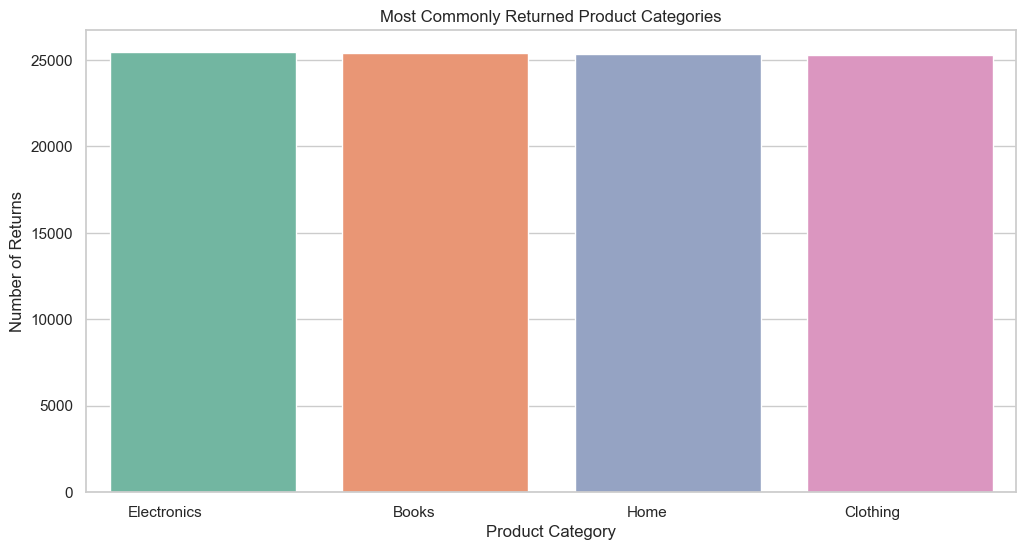

In [101]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the most commonly returned product categories
sns.barplot(x=most_returned_categories.index, y=most_returned_categories.values, palette='Set2')

# Set labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Returns')
plt.title('Most Commonly Returned Product Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()

### Returns by Gender

Gender
Female    50284.0
Male      51192.0
Name: Returns, dtype: float64


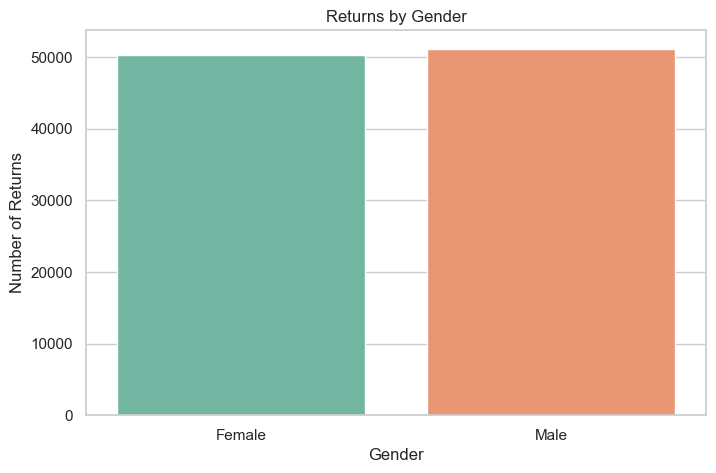

In [102]:
# Group by gender and calculate the total number of returns
returns_by_gender = df.groupby('Gender')['Returns'].sum()

# Display the result
print(returns_by_gender)

# Visualize the results with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=returns_by_gender.index, y=returns_by_gender.values, palette='Set2')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Returns')
plt.title('Returns by Gender')

# Show the plot
plt.show()

### Monthly Trends in Total Sales

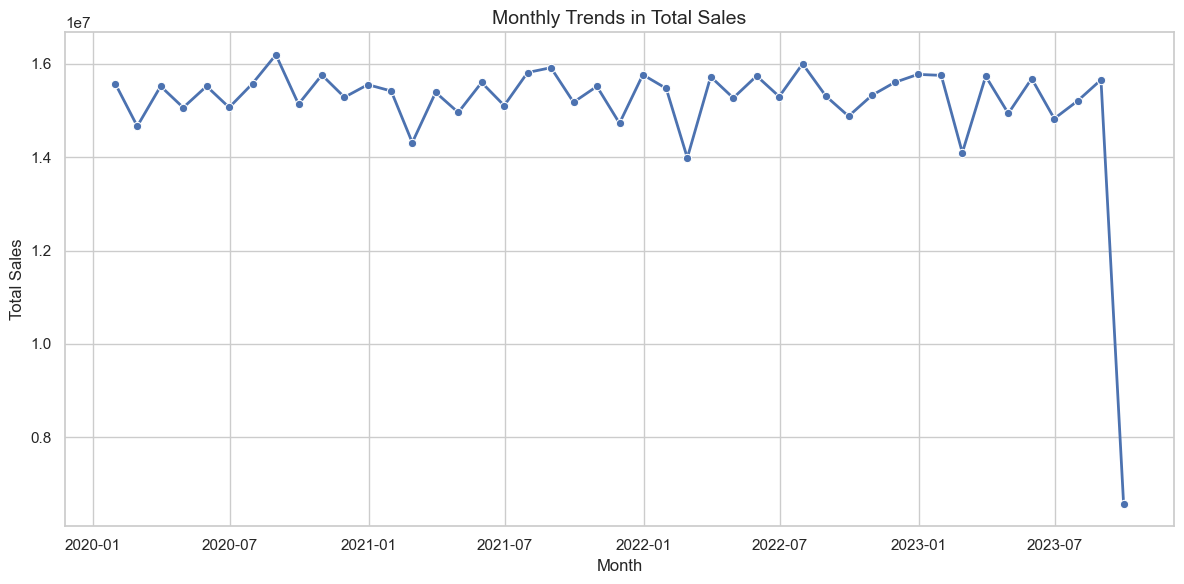

In [106]:
import matplotlib.dates as mdates

# Plotting the time series with improved formatting and style
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_total_sales.index, y=monthly_total_sales.values, marker='o', linewidth=2)

# Rotate x-axis labels for readability
plt.xticks(rotation=0)

# Set labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Trends in Total Sales', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### Trends in returns over time

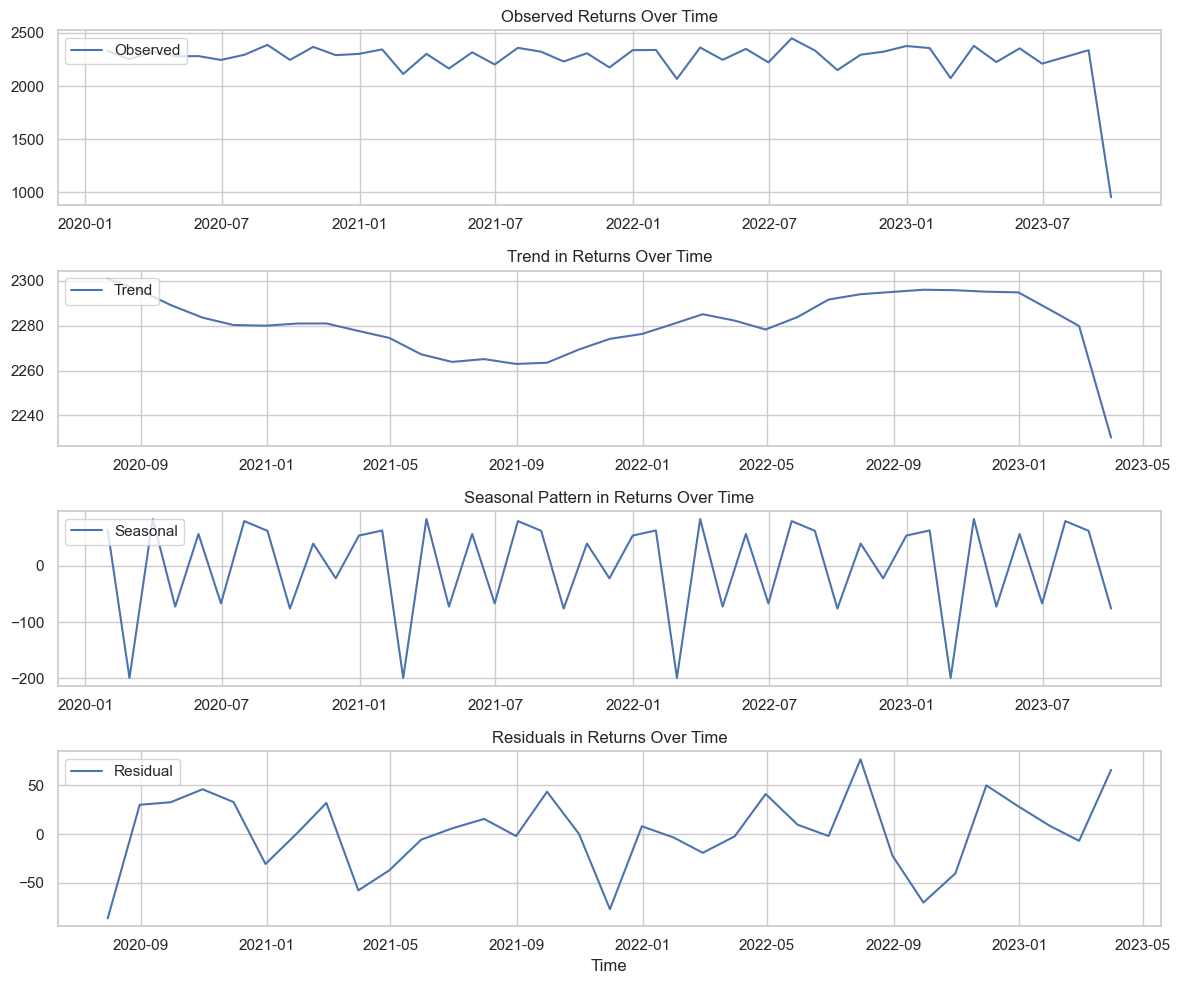

In [107]:
# Plot the decomposed components with improved formatting
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Observed Returns Over Time')
plt.xlabel('')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend in Returns Over Time')
plt.xlabel('')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Pattern in Returns Over Time')
plt.xlabel('')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals in Returns Over Time')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

### Customer Segmentation based on Total Purchases and Average Purchase Amount

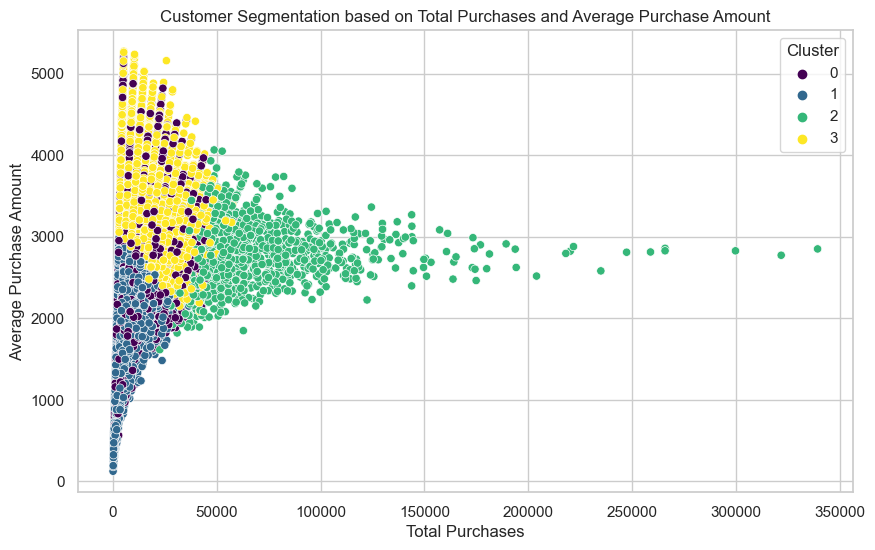

   Cluster  Total Purchases  Average Purchase Amount  Total Returns  \
0        0     16509.592967              2734.268483       2.394202   
1        1     10309.408296              2114.593116       1.886231   
2        2     62405.600263              2782.800951       9.948718   
3        3     18606.524239              3198.061539       2.467153   

   Churn Status  
0      1.000000  
1      0.002044  
2      0.562788  
3      0.000000  


In [108]:
# Create a customer-level dataset with relevant metrics for segmentation
customer_data = df.groupby('Customer Name').agg({
    'Total Purchase Amount': ['sum', 'mean'],
    'Returns': 'sum',
    'Churn': 'max'
}).reset_index()
customer_data.columns = ['Customer Name', 'Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data_imputed)

# Visualize and interpret the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Total Purchases', y='Average Purchase Amount', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Total Purchases and Average Purchase Amount')
plt.show()

# Analyze other metrics by cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total Purchases': 'mean',
    'Average Purchase Amount': 'mean',
    'Total Returns': 'mean',
    'Churn Status': 'mean'
}).reset_index()

print(cluster_summary)

### Correlation Matrix Heatmap

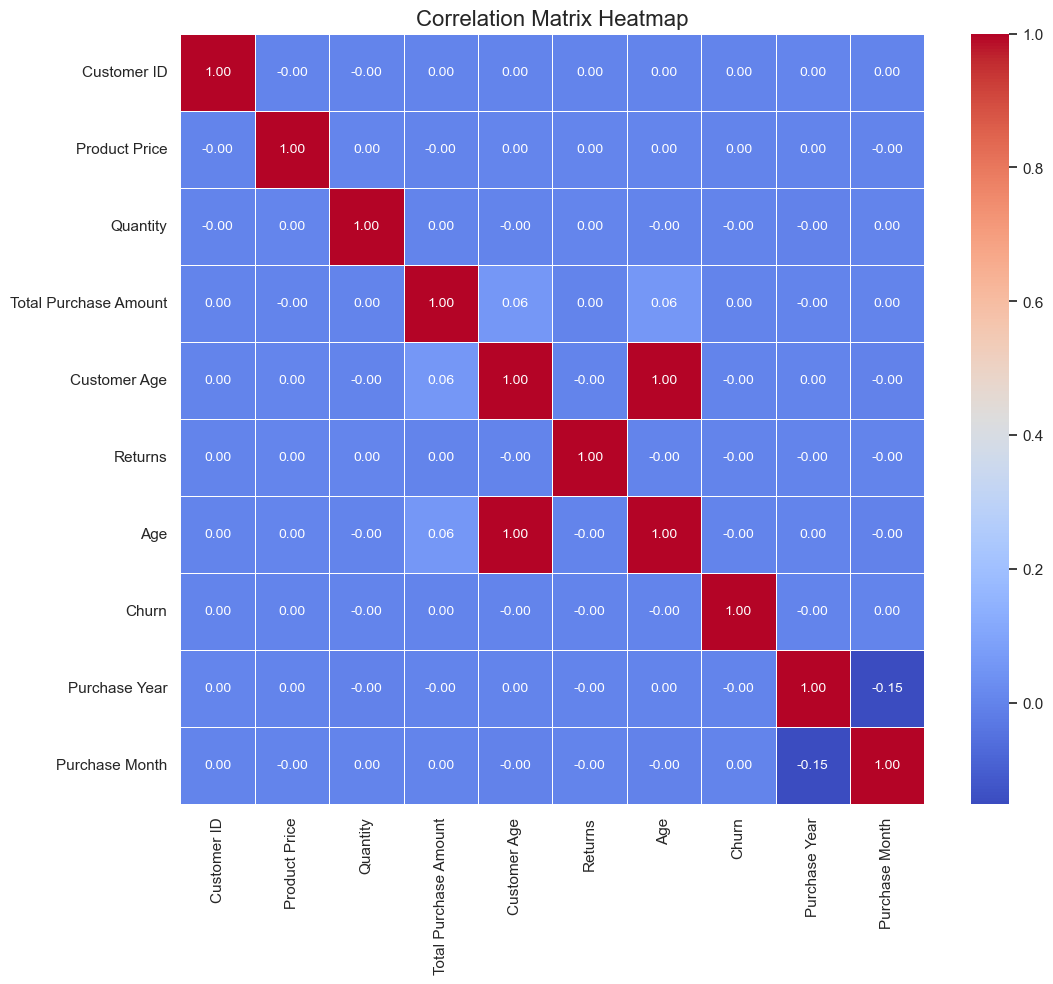

In [109]:
# Create a seaborn heatmap for the correlation matrix with adjusted figure size and font size
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})

# Set title and adjust fontsize
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

## 1) Discuss and explain the purpose of a recommendation system for online retail business in machine learning. Train and test machine learning models for the user-user or item-item collaborative filtering. Justify your recommendations for the considered scenario by providing a conceptual insight.


<p>An essential part of online retail is a recommendation system, which uses machine learning to deliver users customized product recommendations. Enhancing the entire shopping experience, promoting participation, and raising income are the main objectives.</p>
<p>Sophisticated algorithms are used by recommender systems to examine past interactions, preferences, and user behavior. The system provides personalized product recommendations based on the understanding of each customer's unique preferences, enhancing the relevance and pleasure of the shopping experience.</p>
<p>Users are encouraged to investigate a greater variety of products by personalized recommendations. As a result of their increased involvement, users are staying on the platform longer and finding goods they may not have actively searched for. Users are efficiently guided through the vast product library by the system.</p>
<p>Systems that make recommendations help users have a smooth and joyful experience. Customers can use the platform more easily by needing less effort to locate the things they want. The technology anticipates the requirements and preferences of the user, functioning as a virtual shopping assistant.</p>
<p>Tailored advice lead directly to increased client satisfaction. Customers are more likely to come back and make more purchases when they can easily identify products that suit their interests. This promotes client loyalty and helps with long-term retention.</p>
<p>To sum up, an online retail recommendation system is an effective tool that helps match product offerings with client preferences. Businesses can improve user pleasure, increase engagement, and eventually obtain a competitive advantage in the ever-changing e-commerce market by offering individualized recommendations.</p>

I'll simulate user interactions based on customer purchase history and use customer and product information for collaborative filtering.

In [34]:
# Select relevant columns
df_rating = df[['Customer ID', 'Product Category', 'Total Purchase Amount']]

# Group by 'Customer ID' and 'Product Category', and calculate the mean 'Total Purchase Amount'
average_purchase_amount = df_rating.groupby(['Customer ID', 'Product Category'])['Total Purchase Amount'].mean().reset_index()

# Divide 'Total Purchase Amount' into 5 groups (bins)
average_purchase_amount['Rating'] = pd.cut(average_purchase_amount['Total Purchase Amount'], bins=5, labels=[1, 2, 3, 4, 5])

# Merge the ratings with the original DataFrame
df_with_ratings = pd.merge(df, average_purchase_amount[['Customer ID', 'Product Category', 'Rating']], 
                           on=['Customer ID', 'Product Category'], how='left')

# Display the resulting DataFrame with the 'Rating' column
print(df_with_ratings.head())

   Customer ID Product Category  Product Price  Quantity  \
0        44605             Home            177         1   
1        44605      Electronics            174         3   
2        44605            Books            413         1   
3        44605      Electronics            396         3   
4        44605            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Age  Gender  Churn  Purchase Year  Purchase Month Rating  
0   31  Female      0           2023               5      3  
1   31  Female      0           20

In [35]:
df_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Customer ID            250000 non-null  int64   
 1   Product Category       250000 non-null  object  
 2   Product Price          250000 non-null  int64   
 3   Quantity               250000 non-null  int64   
 4   Total Purchase Amount  250000 non-null  int64   
 5   Payment Method         250000 non-null  object  
 6   Customer Age           250000 non-null  int64   
 7   Returns                250000 non-null  float64 
 8   Customer Name          250000 non-null  object  
 9   Age                    250000 non-null  int64   
 10  Gender                 250000 non-null  object  
 11  Churn                  250000 non-null  int64   
 12  Purchase Year          250000 non-null  int64   
 13  Purchase Month         250000 non-null  int64   
 14  Rating              

In [36]:
# Convert 'Rating' to numeric for the entire dataset
df_with_ratings['Rating'] = pd.to_numeric(df_with_ratings['Rating'], errors='coerce')

In [37]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df_with_ratings, test_size=0.25, random_state=42)

# Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define the baseline model to always return a default rating (e.g., 3.0)
def baseline(user_id, product_category):
    return 3.0

# Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    # Construct a list of user-product_category tuples from the testing dataset
    id_pairs = zip(test_data['Customer ID'], test_data['Product Category'])
    
    # Predict the rating for every user-product_category tuple
    y_pred = np.array([cf_model(user, category) for (user, category) in id_pairs])
    
    # Extract the actual ratings given by the users in the test data
    y_true = np.array(test_data['Rating'])
    
    # Return the final RMSE score
    return rmse(y_true, y_pred)

# Example: Calculate the RMSE for the baseline model
baseline_rmse = score(baseline)
print(f'RMSE for Baseline Model: {baseline_rmse}')

RMSE for Baseline Model: 1.066193228265871


### Ratings Matrix

In [38]:
# Create a user-item matrix (pivot table)
ratings_matrix = train_data.pivot_table(index='Customer ID', columns='Product Category', values='Rating', fill_value=0)

In [39]:
# Display the ratings matrix
print("Ratings Matrix:")
print(ratings_matrix.head())

Ratings Matrix:
Product Category  Books  Clothing  Electronics  Home
Customer ID                                         
1                     5         0            1     0
2                     5         0            2     0
3                     0         2            4     2
4                     0         3            1     1
5                     4         0            0     1


### Mean

In [40]:
# Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# User-Based Collaborative Filter using Mean Ratings
def cf_user_mean(user_id, product_category):
    # Check if product_category exists in ratings_matrix
    if product_category in ratings_matrix.columns:
        # Compute the mean of all the ratings given to the product_category
        mean_rating = ratings_matrix[product_category].mean()
    else:
        # Default to a rating of 3.0 in the absence of any information
        mean_rating = 3.0
    
    return mean_rating

# Function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    # Construct a list of user-product_category tuples from the testing dataset
    id_pairs = zip(test_data['Customer ID'], test_data['Product Category'])
    
    # Predict the rating for every user-product_category tuple using the Mean model
    mean_pred = np.array([cf_model(user, category) for (user, category) in id_pairs])
    
    # Extract the actual ratings given by the users in the test data
    y_true = np.array(test_data['Rating'])
    
    # Return the final RMSE score for the Mean model
    return rmse(y_true, mean_pred)

# Calculate the RMSE for the Mean model
mean_rmse = score(cf_user_mean)
print(f'RMSE for Mean Model: {mean_rmse}')

RMSE for Mean Model: 1.5483743284373739


### Weighted Mean

In [41]:
def cf_user_weighted_mean(user_id, product_category):
    if product_category in ratings_matrix.columns:
        # Extract the ratings for the specified product category
        m_ratings = ratings_matrix[product_category]
        
        # Find indices of missing ratings for the specified product category
        idx = m_ratings[m_ratings.isnull()].index
        
        # Drop NaN values
        m_ratings = m_ratings.dropna()
        
        # Use the number of ratings as weights
        weights = len(m_ratings) - np.arange(len(m_ratings))  # Reverse weights to give higher importance to recent ratings
        
        # Compute the weighted mean rating
        wmean_rating = np.dot(weights, m_ratings) / (weights.sum() + 1e-6)  # Adding a small epsilon to avoid division by zero
        
    else:
        # Default to a rating of 3.0 in the absence of any information
        wmean_rating = 3.0
    
    return wmean_rating

# Calculate the RMSE for the Weighted Mean model
weighted_mean_rmse = score(cf_user_weighted_mean)
print(f'RMSE for Weighted Mean Model: {weighted_mean_rmse}')

RMSE for Weighted Mean Model: 1.5493094682447879


### Demographics

In [42]:
def cf_user_demographic_weighted_mean(user_id, product_category):
    if product_category in ratings_matrix.columns:
        # Extract the ratings for the specified product category
        m_ratings = ratings_matrix[product_category]
        
        # Find indices of missing ratings for the specified product category
        idx = m_ratings[m_ratings.isnull()].index
        
        # Drop NaN values
        m_ratings = m_ratings.dropna()
        
        # Use demographic information (e.g., Age and Gender) as weights
        weights = df_with_ratings.loc[m_ratings.index, ['Age', 'Gender']].groupby(['Age', 'Gender']).cumcount() + 1
        
        # Compute the weighted mean rating
        wmean_rating = np.dot(weights, m_ratings) / (weights.sum() + 1e-6)  # Adding a small epsilon to avoid division by zero
        
    else:
        # Default to a rating of 3.0 in the absence of any information
        wmean_rating = 3.0
    
    return wmean_rating

# Calculate the RMSE for the Demographic Weighted Mean model
demographic_weighted_mean_rmse = score(cf_user_demographic_weighted_mean)
print(f'RMSE for Demographic Weighted Mean Model: {demographic_weighted_mean_rmse}')

RMSE for Demographic Weighted Mean Model: 1.547030077377747


### 2) Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can you express major divergence between these models? Compare and contrast the machine learning results obtained based on both algorithms.

### Apriori Algorithm

In [43]:
# Extract relevant columns for Market Basket Analysis
mba_df = df_with_ratings[['Customer ID', 'Product Category']]

# Convert the data into the required format for Apriori
basket = (mba_df.groupby(['Customer ID', 'Product Category'])
          .size()
          .unstack(fill_value=0)
          .reset_index())

# Encode the data for Apriori
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.drop('Customer ID', axis=1).applymap(encode_units)

# Use Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Use Association Rules to generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
     support                              itemsets
0   0.714927                               (Books)
1   0.717948                            (Clothing)
2   0.719136                         (Electronics)
3   0.719921                                (Home)
4   0.510219                     (Books, Clothing)
5   0.508951                  (Books, Electronics)
6   0.511246                         (Books, Home)
7   0.512193               (Electronics, Clothing)
8   0.512595                      (Home, Clothing)
9   0.513642                   (Home, Electronics)
10  0.362619        (Books, Electronics, Clothing)
11  0.364089               (Books, Home, Clothing)
12  0.362961            (Books, Home, Electronics)
13  0.365317         (Home, Electronics, Clothing)
14  0.258070  (Books, Home, Electronics, Clothing)

Association Rules:
                       antecedents              consequents   support  \
0                          (Books)               (Clothing)  0.510219   

C:\Users\Dell Latitude\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### FP Growth Algorithm

In [44]:
# Extract relevant columns for Market Basket Analysis
mba_df2 = df_with_ratings[['Customer ID', 'Product Category']]

# Convert the data into the required format for FP-Growth
basket = (mba_df2.groupby(['Customer ID', 'Product Category'])
          .size()
          .unstack(fill_value=0)
          .reset_index())

# Encode the data for FP-Growth
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.drop('Customer ID', axis=1).applymap(encode_units)

# Use FP-Growth algorithm to find frequent itemsets
frequent_itemsets_fp = fpgrowth(basket_sets, min_support=0.02, use_colnames=True)

# Use Association Rules to generate rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp)

print("\nAssociation Rules (FP-Growth):")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

C:\Users\Dell Latitude\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets (FP-Growth):
     support                              itemsets
0   0.719136                         (Electronics)
1   0.717948                            (Clothing)
2   0.714927                               (Books)
3   0.719921                                (Home)
4   0.513642                   (Home, Electronics)
5   0.512193               (Electronics, Clothing)
6   0.512595                      (Home, Clothing)
7   0.365317         (Home, Electronics, Clothing)
8   0.510219                     (Books, Clothing)
9   0.508951                  (Books, Electronics)
10  0.511246                         (Books, Home)
11  0.364089               (Books, Home, Clothing)
12  0.362619        (Books, Electronics, Clothing)
13  0.362961            (Books, Home, Electronics)
14  0.258070  (Books, Home, Electronics, Clothing)

Association Rules (FP-Growth):
                       antecedents              consequents   support  \
0                           (Home)            (E

### Comparing Results

In [45]:
# Display Apriori results
print("Apriori Results:")
print(rules)

# Display FP-Growth results
print("\nFP-Growth Results:")
print(rules_fp)

# Compare support metrics
print("\nSupport Comparison:")
print("Apriori Support Mean:", rules['support'].mean())
print("FP-Growth Support Mean:", rules_fp['support'].mean())

# Compare the number of generated rules
print("\nNumber of Rules Comparison:")
print("Number of Apriori Rules:", len(rules))
print("Number of FP-Growth Rules:", len(rules_fp))

Apriori Results:
                       antecedents              consequents  \
0                          (Books)               (Clothing)   
1                       (Clothing)                  (Books)   
2                          (Books)            (Electronics)   
3                    (Electronics)                  (Books)   
4                          (Books)                   (Home)   
5                           (Home)                  (Books)   
6                    (Electronics)               (Clothing)   
7                       (Clothing)            (Electronics)   
8                           (Home)               (Clothing)   
9                       (Clothing)                   (Home)   
10                          (Home)            (Electronics)   
11                   (Electronics)                   (Home)   
12            (Books, Electronics)               (Clothing)   
13               (Books, Clothing)            (Electronics)   
14         (Electronics, Clothing)    

### 3) Create an interactive Dashboard aimed at older adults (65+) with specific features to summarise the most important aspects of the data and identify through your visualisation why this dataset is suitable for Machine Learning models in an online retail business. Explain how your dashboard is designed with this demographic in mind.


In [46]:
df_with_ratings.describe()

Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  250000.000000  250000.000000  250000.000000          250000.000000   
mean    25017.632092     254.742724       3.004936            2725.385196   
std     14412.515718     141.738104       1.414737            1442.576095   
min         1.000000      10.000000       1.000000             100.000000   
25%     12590.000000     132.000000       2.000000            1476.000000   
50%     25011.000000     255.000000       3.000000            2725.000000   
75%     37441.250000     377.000000       4.000000            3975.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age         Churn  \
count  250000.000000  250000.000000  250000.000000  250000.00000   
mean       43.798276       0.405904      43.798276       0.20052   
std        15.364915       0.491067      15.364915       0.40039   
min        18.000000       0.000000      18.000000       0.00000   
25%        30.000000       0.000000      30.000000       0.00000   
50%        44.000000       0.000000      44.000000       0.00000   
75%        57.000000       1.000000      57.000000       0.00000   
max        70.000000       1.000000      70.000000       1.00000   

       Purchase Year  Purchase Month         Rating  
count  250000.000000   250000.000000  250000.000000  
mean     2021.377136        6.190376       2.999664  
std         1.074712        3.353238       1.068403  
min      2020.000000        1.000000       1.000000  
25%      2020.000000        3.000000       2.000000  
50%      2021.000000        6.000000       3.000000  
75%      2022.000000        9.000000       4.000000  
max      2023.000000       12.000000       5.000000

In [49]:
# Function to update the plot based on selected age group and gender
def update_plot(age_group, gender):
    filtered_data = df_with_ratings[(df_with_ratings['Age'] == age_group) & (df_with_ratings['Gender'] == gender)]
    # Perform analysis or visualization based on filtered_data

    # Example: Bar plot of total purchase amount by age group and gender
    purchase_amount = filtered_data.groupby(['Age', 'Gender'])['Total Purchase Amount'].sum().reset_index()
    plt.figure(figsize=(8, 6))
    plt.bar(purchase_amount.index, purchase_amount['Total Purchase Amount'], color='skyblue')
    plt.title(f"Total Purchase Amount by {age_group} and {gender}")
    plt.xlabel("Index")
    plt.ylabel("Total Purchase Amount")
    plt.show()

# Unique age groups and genders in the dataset
age_groups = df_with_ratings['Age'].unique()
genders = df_with_ratings['Gender'].unique()

# Create dropdown widgets for age groups and genders
age_dropdown = widgets.Dropdown(options=age_groups, description='Age:', disabled=False)
gender_dropdown = widgets.Dropdown(options=genders, description='Gender:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, age_group=age_dropdown, gender=gender_dropdown)

interactive(children=(Dropdown(description='Age:', options=(31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, 24, 48…

In [50]:
# Function to update the plot based on selected age group
def update_plot(age_group):
    filtered_data = df_with_ratings[df_with_ratings['Age'] == age_group]
    gender_counts = filtered_data['Gender'].value_counts()

    plt.figure(figsize=(6, 4))
    gender_counts.plot(kind='bar', color='skyblue')
    plt.title(f"Gender Frequency for Age Group {age_group}")
    plt.xlabel("Gender")
    plt.ylabel("Frequency")
    plt.xticks(rotation=0)
    plt.show()

# Unique age groups in the dataset
age_groups = df_with_ratings['Age'].unique()

# Create a dropdown widget for age groups
age_dropdown = widgets.Dropdown(options=age_groups, description='Age:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, age_group=age_dropdown)

interactive(children=(Dropdown(description='Age:', options=(31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, 24, 48…

In [51]:
# Function to update the plot based on selected gender
def update_plot(gender):
    filtered_data = df_with_ratings[df_with_ratings['Gender'] == gender]
    avg_amount = filtered_data.groupby('Customer ID')['Total Purchase Amount'].mean()
    plt.figure(figsize=(8, 5))
    avg_amount.plot(kind='hist', bins=20, color='skyblue')
    plt.title(f"Average Amount Spent per Purchase for {gender} Customers")
    plt.xlabel("Average Amount")
    plt.ylabel("Frequency")
    plt.show()

# Unique genders in the dataset
genders = df_with_ratings['Gender'].unique()

# Create dropdown widget for gender
gender_dropdown = widgets.Dropdown(options=genders, description='Gender:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, gender=gender_dropdown)

interactive(children=(Dropdown(description='Gender:', options=('Female', 'Male'), value='Female'), Output()), …

In [52]:
# Function to update the plot based on selected age group
def update_plot(age_group):
    filtered_data = df_with_ratings[df_with_ratings['Age'] == age_group]
    avg_purchase_amount = filtered_data.groupby('Age')['Total Purchase Amount'].mean().reset_index()
    
    plt.figure(figsize=(8, 6))
    plt.bar(avg_purchase_amount['Age'], avg_purchase_amount['Total Purchase Amount'], color='skyblue')
    plt.title(f"Average Amount Spent per Purchase for Age Group {age_group}")
    plt.xlabel("Age Group")
    plt.ylabel("Average Purchase Amount")
    plt.xticks(avg_purchase_amount['Age'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Unique age groups in the dataset
age_groups = df_with_ratings['Age'].unique()

# Create a dropdown widget for age groups
age_dropdown = widgets.Dropdown(options=age_groups, description='Age Group:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, age_group=age_dropdown)

interactive(children=(Dropdown(description='Age Group:', options=(31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, …

In [53]:
# Function to update the plot based on selected gender
def update_plot(gender):
    filtered_data = df_with_ratings[df_with_ratings['Gender'] == gender]
    avg_purchase_amount = filtered_data['Total Purchase Amount'].mean()
    
    plt.figure(figsize=(8, 5))
    df_with_ratings[df_with_ratings['Gender'] == gender]['Product Category'].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Popular Product Categories for {gender} Customers")
    plt.xlabel("Product Categories")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# Unique genders in the dataset
genders = df_with_ratings['Gender'].unique()

# Create dropdown widget for gender
gender_dropdown = widgets.Dropdown(options=genders, description='Gender:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, gender=gender_dropdown)

interactive(children=(Dropdown(description='Gender:', options=('Female', 'Male'), value='Female'), Output()), …

In [54]:
# Function to update the plot based on selected age group
def update_plot(age_group):
    filtered_data = df_with_ratings[df_with_ratings['Age'] == age_group]
    payment_distribution = filtered_data['Payment Method'].value_counts()
    
    plt.figure(figsize=(8, 6))
    payment_distribution.plot(kind='bar', color='skyblue')
    plt.title(f"Payment Method Distribution for Age Group {age_group}")
    plt.xlabel("Payment Method")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# Unique age groups in the dataset
age_groups = df_with_ratings['Age'].unique()

# Create dropdown widget for age groups
age_dropdown = widgets.Dropdown(options=age_groups, description='Age Group:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, age_group=age_dropdown)

interactive(children=(Dropdown(description='Age Group:', options=(31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, …

In [55]:
# Function to update the plot based on selected product category
def update_plot(product_category):
    filtered_data = df_with_ratings[df_with_ratings['Product Category'] == product_category]
    prices = filtered_data['Product Price']
    
    plt.figure(figsize=(8, 6))
    plt.hist(prices, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Price Distribution for {product_category}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

# Unique product categories in the dataset
categories = df_with_ratings['Product Category'].unique()

# Create dropdown widget for product categories
category_dropdown = widgets.Dropdown(options=categories, description='Category:', disabled=False)

# Create an interactive plot using widgets
widgets.interactive(update_plot, product_category=category_dropdown)

interactive(children=(Dropdown(description='Category:', options=('Home', 'Electronics', 'Books', 'Clothing'), …